In [4]:
# Imports necessary
import os
import pandas as pd
import numpy as np
import requests
import json

In [5]:
# This cell makes the call to fpl api and receives the data in 
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
response = requests.get(url)
response = json.loads(response.content)

In [6]:
# Keys of the json response
response.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [7]:
# Creating dataframes from response keys
elements_df = pd.DataFrame(response['elements'])
elements_types_df = pd.DataFrame(response['element_types'])
teams_df = pd.DataFrame(response['teams'])

In [29]:
example_df = pd.DataFrame(response['teams'])
sorted(example_df.columns)
example_df.head()

,code,draw,form,id,loss,name,played,points,position,short_name,...,team_division,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id
0,3,0,None,1,0,Arsenal,0,0,0,ARS,...,None,False,0,1180,1240,1170,1170,1150,1200,1
1,7,0,None,2,0,Aston Villa,0,0,0,AVL,...,None,False,0,1020,1050,970,980,1000,1040,2
2,91,0,None,3,0,Bournemouth,0,0,0,BOU,...,None,False,0,1020,1020,990,1030,1000,1050,127
3,36,0,None,4,0,Brighton,0,0,0,BHA,...,None,False,0,1050,1010,1100,1100,1040,1030,131
4,90,0,None,5,0,Burnley,0,0,0,BUR,...,None,False,0,1110,1180,1130,1070,970,1110,43


In [6]:
elements_df.head()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,...,threat,ict_index,influence_rank,influence_rank_type,creativity_rank,creativity_rank_type,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type
0,100.0,100.0,69140,0,0,-4,4,0,2,2.0,...,124.0,38.7,269,106,336,114,238,61,320,114
1,100.0,100.0,98745,0,0,-1,1,0,2,3.8,...,66.0,28.2,309,121,324,107,306,101,346,124
2,100.0,100.0,111457,0,0,-3,3,0,2,2.0,...,67.0,44.3,271,108,202,52,304,99,295,101
3,100.0,100.0,154043,0,0,-5,5,1,2,0.5,...,37.0,45.9,239,95,212,54,347,124,289,98
4,100.0,100.0,39476,0,0,-2,2,1,2,0.0,...,110.0,58.5,129,49,345,117,252,70,235,70


In [7]:
# Gives all columns in dataframe
sorted(elements_df.columns)

['assists',
 'bonus',
 'bps',
 'chance_of_playing_next_round',
 'chance_of_playing_this_round',
 'clean_sheets',
 'code',
 'cost_change_event',
 'cost_change_event_fall',
 'cost_change_start',
 'cost_change_start_fall',
 'creativity',
 'creativity_rank',
 'creativity_rank_type',
 'dreamteam_count',
 'element_type',
 'ep_next',
 'ep_this',
 'event_points',
 'first_name',
 'form',
 'goals_conceded',
 'goals_scored',
 'ict_index',
 'ict_index_rank',
 'ict_index_rank_type',
 'id',
 'in_dreamteam',
 'influence',
 'influence_rank',
 'influence_rank_type',
 'minutes',
 'news',
 'news_added',
 'now_cost',
 'own_goals',
 'penalties_missed',
 'penalties_saved',
 'photo',
 'points_per_game',
 'red_cards',
 'saves',
 'second_name',
 'selected_by_percent',
 'special',
 'squad_number',
 'status',
 'team',
 'team_code',
 'threat',
 'threat_rank',
 'threat_rank_type',
 'total_points',
 'transfers_in',
 'transfers_in_event',
 'transfers_out',
 'transfers_out_event',
 'value_form',
 'value_season',
 'we

In [50]:
# Creating a smaller dataframes with only the most important columns
slim_elements_df = elements_df[['second_name','form','clean_sheets','team','element_type','selected_by_percent','now_cost','minutes','transfers_in','value_season','total_points']]

In [51]:
# Replacing element_type value to position from element_types_df index. Same with team
slim_elements_df['position'] = elements_df.element_type.map(elements_types_df.set_index('id').singular_name)
slim_elements_df['team'] = elements_df.team.map(teams_df.set_index('id').name)

# Creating a (slim) dataframe of only arsenal 
arsenal_team = slim_elements_df.query('team == "Man City"')

# Displaying acc to total points
arsenal_team.sort_values('total_points', ascending=False)

C:\Users\Azkaban\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Azkaban\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,second_name,form,clean_sheets,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position
328,De Bruyne,7.4,14,Man City,3,51.9,107,2426,5895319,20.1,215,Midfielder
330,Mahrez,5.6,8,Man City,3,10.4,85,1628,2372663,17.5,149,Midfielder
327,Sterling,5.6,10,Man City,3,16.2,117,2276,2390107,12.5,146,Midfielder
323,Agüero,1.6,5,Man City,4,12.7,117,1449,3382967,11.3,132,Forward
324,de Jesus,1.6,7,Man City,4,4.0,96,1549,807521,10.9,105,Forward
332,Silva,2.6,9,Man City,3,4.2,73,1441,1413841,14.1,103,Midfielder
325,Santana de Moraes,4.2,12,Man City,1,12.4,60,2531,1119905,17.2,103,Goalkeeper
331,Veiga de Carvalho e Silva,2.6,7,Man City,3,8.3,77,1672,1039879,12.9,99,Midfielder
317,Walker,2.4,9,Man City,2,12.1,56,2059,966696,15.2,85,Defender
337,Hernandez,1.4,12,Man City,3,1.3,54,2207,249203,14.8,80,Midfielder


In [40]:
# Creating 'value' from 'value_season' as value_season is a string, so better operations
# value = total_points/cost 

slim_elements_df['value'] = slim_elements_df.value_season.astype(float)
slim_elements_df.sort_values('value', ascending=False).head(10)

C:\Users\Azkaban\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,web_name,creativity_rank_type,clean_sheets,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
143,Pope,1,13,Burnley,1,20.3,50,2880,2101229,29.4,147,Goalkeeper,29.4
454,Lundstram,16,10,Sheffield Utd,2,34.1,47,2269,4151486,28.5,134,Defender,28.5
467,Henderson,7,11,Sheffield Utd,1,16.4,52,2700,2003565,26.3,137,Goalkeeper,26.3
202,Guaita,68,10,Crystal Palace,1,1.7,49,2610,374544,25.5,125,Goalkeeper,25.5
265,Schmeichel,8,11,Leicester,1,13.7,54,2880,1376461,25.4,137,Goalkeeper,25.4
627,Patrício,71,11,Wolves,1,10.5,53,2880,1187854,25.3,134,Goalkeeper,25.3
111,Ryan,64,8,Brighton,1,11.9,47,2940,1200016,25.3,119,Goalkeeper,25.3
389,Dubravka,69,10,Newcastle,1,2.4,51,2880,260458,25.1,128,Goalkeeper,25.1
451,Baldock,14,11,Sheffield Utd,2,11.6,50,2880,1636660,25.0,125,Defender,25.0
561,Foster,2,9,Watford,1,3.7,49,2880,444432,24.1,118,Goalkeeper,24.1


In [11]:
# Only those players that have value > 0 are kept. This removes players with 0 points
slim_elements_df = slim_elements_df.loc[slim_elements_df.value > 0]

In [25]:
# Tells mean of value of position
position_pivot = slim_elements_df.pivot_table(index='position', values = 'value', aggfunc = np.mean).reset_index()
position_pivot.sort_values('value', ascending = False)

,position,value
2,Goalkeeper,12.875676
0,Defender,10.208721
3,Midfielder,8.669124
1,Forward,8.442667


In [26]:
team_pivot = slim_elements_df.pivot_table(index = 'team', values = 'value', aggfunc = np.mean).reset_index()
team_pivot.sort_values('value', ascending = False)

,team,value
19,Wolves,13.410526
8,Leicester,12.372727
4,Burnley,11.838095
14,Sheffield Utd,11.176000
9,Liverpool,10.662500
10,Man City,10.356522
6,Crystal Palace,10.230435
12,Newcastle,10.114815
15,Southampton,9.769565
3,Brighton,9.548000


In [31]:
# seperate df for each position
gkp_df = slim_elements_df.loc[slim_elements_df.position == 'Goalkeeper']
def_df = slim_elements_df.loc[slim_elements_df.position == 'Defender']
mid_df = slim_elements_df.loc[slim_elements_df.position == 'Midfielder']
fwd_df = slim_elements_df.loc[slim_elements_df.position == 'Forward']

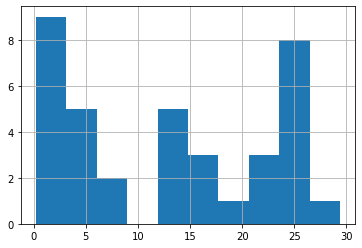

In [35]:
# Histogram tells the number of players with that value
gkp_df.value.hist()

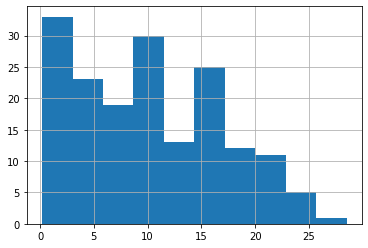

In [36]:
def_df.value.hist()